In [1]:
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
import cv2
import random
from glob import glob
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

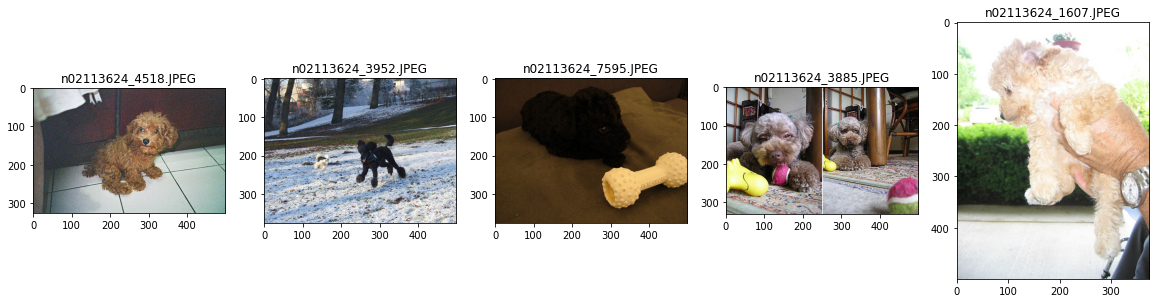

In [2]:
plt.figure(figsize=(20,20))
test_folder = r'D:\Documents\Final Year Sem VII\Final Year Project\Dimensionality reduction\datasets\imagenet 1000(mini)\imagenet-mini\train\n02113624'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path = os.path.join(test_folder,file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [3]:
IMG_WIDTH = 200
IMG_HEIGHT = 200
img_folder = r'D:\Documents\Final Year Sem VII\Final Year Project\Dimensionality reduction\datasets\imagenet 1000(mini)\imagenet-mini\train'

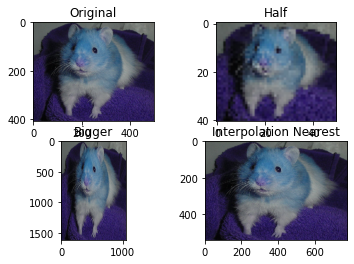

In [4]:
image = cv2.imread("D:/Documents/Final Year Sem VII/Final Year Project/Dimensionality reduction/datasets/imagenet/imagenet/train/ILSVRC2012_val_00005002.jpeg", 1)
# Loading the image
 
half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(image, (1050, 1610))
 
stretch_near = cv2.resize(image, (780, 540),
               interpolation = cv2.INTER_NEAREST)
 
 
Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4
 
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
 
plt.show()

In [5]:
inputFolder = 'train'
os.mkdir('resized')
i = 0
for img in glob(inputFolder + "/*.jpeg"):
    image = cv2.imread(img)
    imgResized = cv2.resize(image, (150, 150))
    cv2.imwrite("resized/image%05i.jpeg" %i, imgResized)
    
    i += 1
    cv2.imshow('image', imgResized)